In [21]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [22]:
con = sqlite3.connect('db')
df = pd.read_sql_query('select * from tmdb_project',con)

# Maiuplationg and aggregating the data and visualizing it 

In [32]:
# what are the months that has the most movies releases?

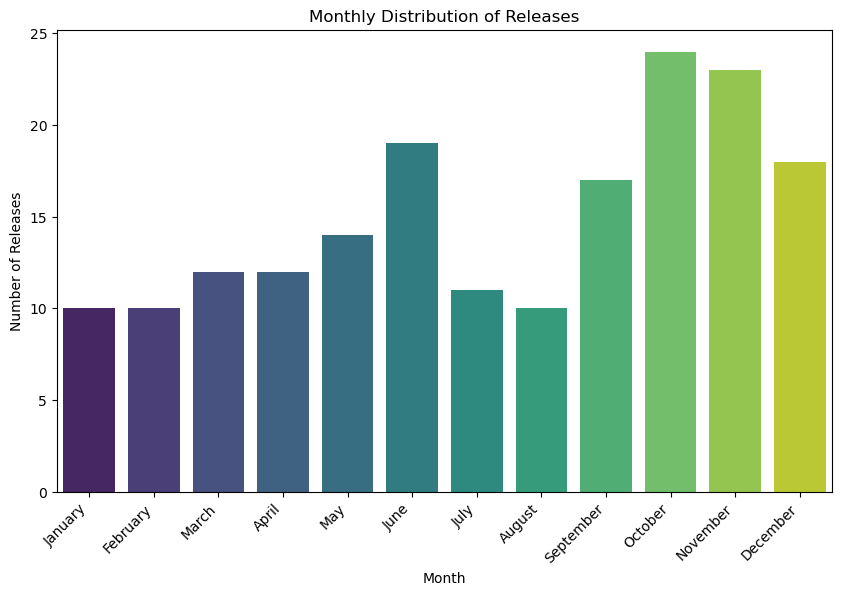

In [24]:

df['release_date']= pd.to_datetime(df['release_date'])
df['month'] = df['release_date'].dt.month_name()

agg = df['month'].value_counts()

agg = agg.reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

plt.figure(figsize=(10, 6))
sns.barplot(x=agg.index, y=agg.values, palette="viridis")


plt.title('Monthly Distribution of Releases')
plt.xlabel('Month')
plt.ylabel('Number of Releases')
plt.xticks(rotation=45, ha='right') 


plt.show()

In [25]:
# what is the average voting for movies per each year

In [26]:

avg_voting_per_year = df.groupby('year')['vote_average'].sum().reset_index()

avg_voting_per_year

,year,vote_average
0,2013,137.5
1,2014,142.3
2,2015,134.4
3,2016,142.9
4,2017,137.3
5,2018,134.0
6,2019,144.0
7,2020,135.9
8,2023,144.6


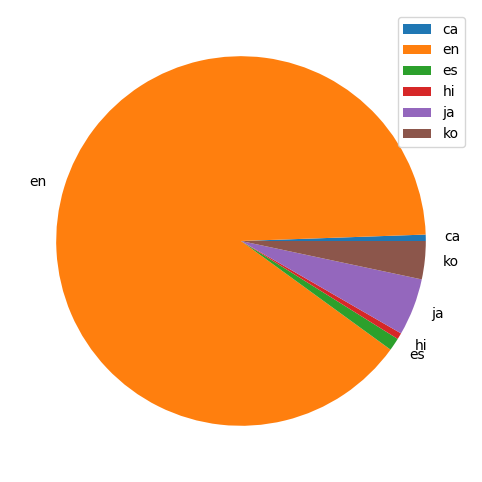

In [27]:
# distrubution of languages of movies
languages = df.groupby('original_language').size()
languages.plot(kind='pie',figsize=(10, 6))
plt.legend()
plt.show()

In [28]:
#what is the most popular movie in the past 10 years
most_popular_movie = df[['original_title','release_date','genre_name']][df['popularity']== df['popularity'].max()]
most_popular_movie

,original_title,release_date,genre_name
160,Killers of the Flower Moon,2023-10-18,"Crime,Drama,History"


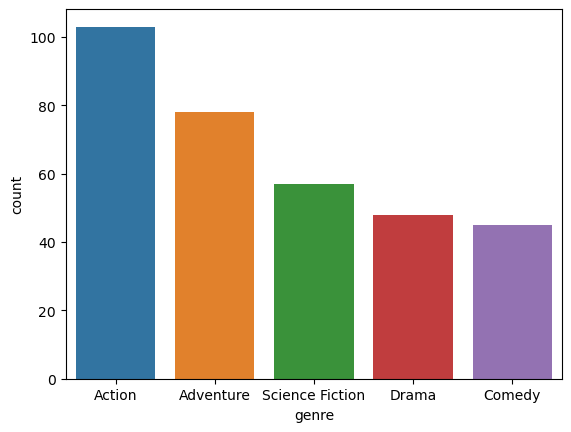

In [29]:
# what is the most comon genre split in the past 10 years?
genre_counts = df['genre_name'].str.split(',').explode().value_counts().reset_index()
genre_counts.columns = ['genre', 'count']

top_genres = genre_counts.head(5)
sns.barplot(x=top_genres['genre'], y = top_genres['count'])
plt.show()

### which year saw the most vote count for movies? 


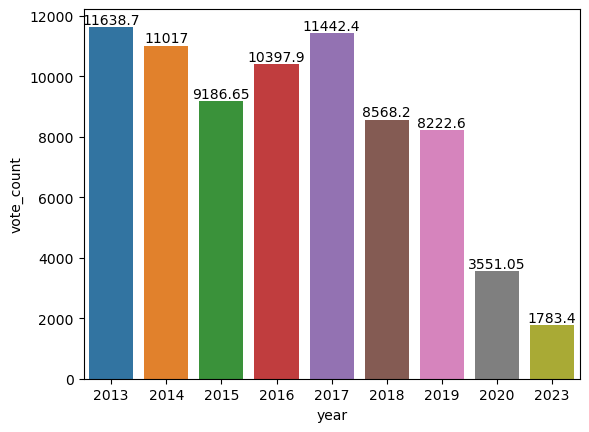

In [30]:
avg_yearly_vote_count =df.groupby('year')['vote_count'].mean().reset_index()

ax = sns.barplot(x=avg_yearly_vote_count['year'] , y= avg_yearly_vote_count['vote_count'])
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()

### Movie with the longest title?

In [31]:
longest_title_movies = df[['title','release_date','genre_name','title_legnth']].sort_values('title_legnth', ascending=False)
longest_title_movies.head()

,title,release_date,genre_name,title_legnth
176,Mission: Impossible - Dead Reckoning Part One,2023-07-08,Action,45
127,How to Train Your Dragon: The Hidden World,2019-01-03,"Adventure,Animation,Family",42
153,Mortal Kombat Legends: Scorpion's Revenge,2020-04-12,"Action,Animation,Fantasy",41
26,The Hobbit: The Battle of the Five Armies,2014-12-10,"Action,Adventure,Fantasy",41
154,The SpongeBob Movie: Sponge on the Run,2020-08-14,"Adventure,Animation,Comedy,Family,Fantasy",38
